In [43]:
import numpy as np

a = np.arange(-10, 12, 3)
d = a
print(a, type(a))

b = np.where(a>0)
print(list(zip(*np.where(a > 4))))
print(a[b[0]])


[-10  -7  -4  -1   2   5   8  11] <class 'numpy.ndarray'>
[(5,), (6,), (7,)]
[ 2  5  8 11]


In [1]:
import pytplot
pytplot.__path__

['/home/www/.local/lib/python3.8/site-packages/pytplot']

In [12]:
import numpy as np
import pytplot, pyspedas
from pytplot import tplot
detail_data = np.arange(10)
rough_data = np.arange(0,10, 3)
print(detail_data, rough_data)
pytplot.store_data('detail_data', data = {'x': detail_data, 'y': detail_data})
pytplot.store_data('rough_data', data = {'x': rough_data, 'y': rough_data})
pytplot.tplot_names()

[0 1 2 3 4 5 6 7 8 9] [0 3 6 9]
0 : tinterpol_test
1 : tinterpol_test1
2 : tinterpol_test1-itrp
3 : tinterpol_test-itrp
4 : detail_data
5 : rough_data
6 : rough_data-itrp


['tinterpol_test',
 'tinterpol_test1',
 'tinterpol_test1-itrp',
 'tinterpol_test-itrp',
 'detail_data',
 'rough_data',
 'rough_data-itrp']

In [13]:
pyspedas.tinterpol('rough_data', interp_to='detail_data')


tinterpol (linear) was applied to: rough_data-itrp


In [14]:
x = pytplot.get_data('rough_data')
y = pytplot.get_data('detail_data')
z = pytplot.get_data('rough_data-itrp')
x,y,z

(variable(times=array([0, 3, 6, 9]), y=array([0, 3, 6, 9])),
 variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])))

In [16]:
import load 


In [23]:
importer = load.orb(trange=['2000-01-01', '2000-01-02'])

In [24]:
import pytplot
pytplot.tplot_names()

0 : tinterpol_test
1 : tinterpol_test1
2 : tinterpol_test1-itrp
3 : tinterpol_test-itrp
4 : detail_data
5 : rough_data
6 : rough_data-itrp
7 : akb_Pass
8 : akb_ILAT
9 : akb_MLAT
10 : akb_MLT
11 : akb_ALT


['tinterpol_test',
 'tinterpol_test1',
 'tinterpol_test1-itrp',
 'tinterpol_test-itrp',
 'detail_data',
 'rough_data',
 'rough_data-itrp',
 'akb_Pass',
 'akb_ILAT',
 'akb_MLAT',
 'akb_MLT',
 'akb_ALT']

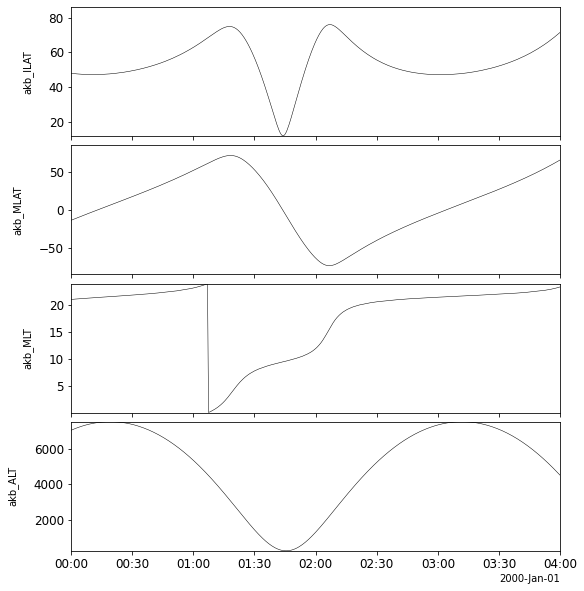

In [27]:
pytplot.tlimit(['2000-01-01 00:00:00', '2000-01-01 04:00:00'])
pytplot.tplot(['akb_ILAT', 'akb_MLAT', 'akb_MLT', 'akb_ALT'])

13-Jul-22 16:12:23: /home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),

13-Jul-22 16:12:23: /home/www/.local/lib/python3.8/site-packages/pytplot/MPLPlotter/tplot.py:236: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  this_axis.set_ylim(yrange)



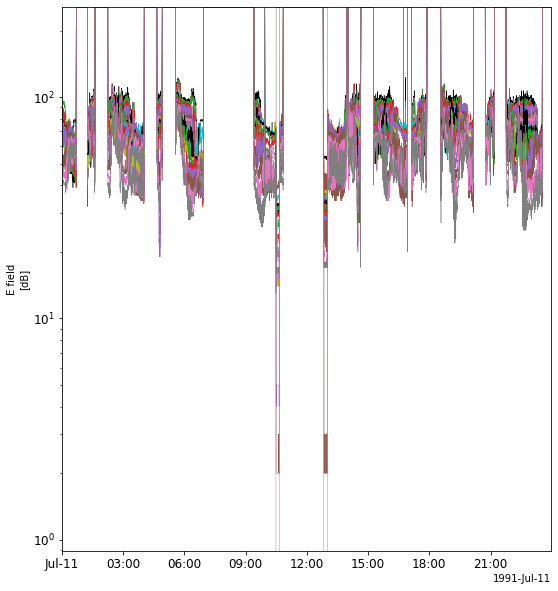

In [1]:
import load
import pytplot
import numpy as np
from pytplot import options
load.mca(trange=['1991-07-11', '1991-07-12'])

Emax = pytplot.get_data('Emax')
Emax.y
Bmax = pytplot.get_data('Bmax')
type(Emax.y)
pytplot.tlimit(['1991-07-11 00:00:00', '1991-07-11 23:59:00'])
pytplot.tplot('Emax')

In [8]:
print(np.count_nonzero( Emax.y == 255))

19


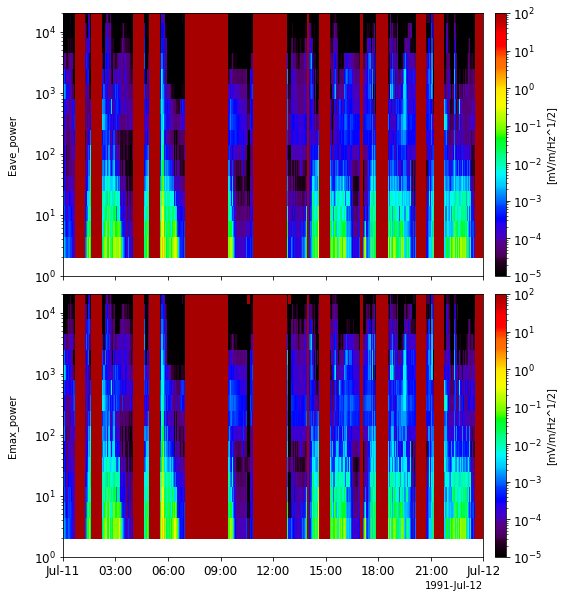

In [9]:
options(['Eave_power', 'Emax_power'], 'spec', 1)
options(['Eave_power', 'Emax_power'], 'ylog', 1)
options(['Eave_power', 'Emax_power'], 'zlog', 1)
options(['Eave_power', 'Emax_power'], 'zrange', [1e-5, 100])
options(['Eave_power', 'Emax_power'], 'yrange', [1, 2e4])
options(['Eave_power', 'Emax_power'], 'ztitle', '[mV/m/Hz^1/2]')
pytplot.tplot(['Eave_power', 'Emax_power'])

07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <ipython-input-40-09691759de28>:28: DeprecationWarning: invalid escape sequence \s
  plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')



Text(0, 0.5, '')

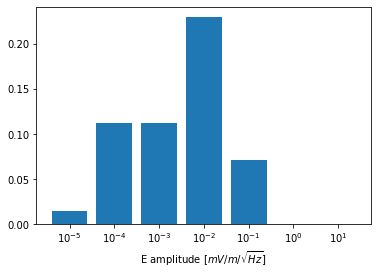

In [40]:
Emax = pytplot.get_data('Emax_amplitude')
Emax_T = Emax.y.T
Emax_1ch = Emax_T[0]
Emax_25dB = (10**(253/20)) * (1e-6)  / np.sqrt(3.16*0.3)

left = np.arange(7)
Emax_amp_0 = Emax_1ch.size
Emax_amp_1 = Emax_1ch[Emax_1ch < 1e1].size 
Emax_amp_2 = Emax_1ch[Emax_1ch < 1].size
Emax_amp_3 = Emax_1ch[Emax_1ch < 1e-1].size
Emax_amp_4 = Emax_1ch[Emax_1ch < 1e-2].size
Emax_amp_5 = Emax_1ch[Emax_1ch < 1e-3].size
Emax_amp_6 = Emax_1ch[Emax_1ch < 1e-4].size
Emax_amp_25dB = Emax_1ch[Emax_1ch > Emax_25dB].size
Emax_seconds = np.array([Emax_amp_6/Emax_amp_0,
               (Emax_amp_5-Emax_amp_6)/Emax_amp_0, 
               (Emax_amp_4-Emax_amp_5)/Emax_amp_0, 
               (Emax_amp_3-Emax_amp_4)/Emax_amp_0, 
               (Emax_amp_2-Emax_amp_3)/Emax_amp_0, 
               (Emax_amp_1-Emax_amp_2)/Emax_amp_0,
               (Emax_amp_0-Emax_amp_1-Emax_amp_25dB)/Emax_amp_0])


import matplotlib.pyplot as plt
labels = ['$10^{-5}$', '$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^0$','$10^1$']
plt.figure()
plt.bar(left, Emax_seconds, tick_label = labels)
plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')
plt.ylabel('')

In [15]:
trange = ['2000-01-01 00:00:00', '2000-01-02 00:00:00']
with open('/Document/Akebono_analysis/VLF_mca/akebono_orbit_error_day_list.txt', mode="a") as f:
    f.write(trange[0] + '\n')

In [22]:
import pyspedas
import pytplot
from pytplot import options, tplot, tlimit, tplot_options, get_data, store_data
import numpy as np
from load import mca, orb

ILAT_min = 55
start_day_string = '1990-01-01'
start_day_time_double = pyspedas.time_double(start_day_string)
seconds_per_day = 86400
day_list = []
for i in range(0, 10):
    time_double = start_day_time_double + i * seconds_per_day
    day_list.append(pyspedas.time_string(time_double, fmt='%Y-%m-%d %H:%M:%S'))

for k in range(len(day_list)-1):
    
    trange = [day_list[k], day_list[k+1]]
    print(trange)
    
    mca(trange= trange)
    try:
        orb(trange= trange)
    except:
        with open('/Document/Akebono_analysis/VLF_mca/akebono_orbit_error_day_list.txt', mode="a") as f:
                f.write(trange[0] + '\n')
        print('orbit file does not exists')
        continue
    print('orbit file exists')
    

['1990-01-01 00:00:00', '1990-01-02 00:00:00']
orbit file exists
['1990-01-02 00:00:00', '1990-01-03 00:00:00']
orbit file does not exists
['1990-01-03 00:00:00', '1990-01-04 00:00:00']
orbit file exists
['1990-01-04 00:00:00', '1990-01-05 00:00:00']
orbit file exists
['1990-01-05 00:00:00', '1990-01-06 00:00:00']
orbit file exists
['1990-01-06 00:00:00', '1990-01-07 00:00:00']
orbit file exists
['1990-01-07 00:00:00', '1990-01-08 00:00:00']
orbit file exists
['1990-01-08 00:00:00', '1990-01-09 00:00:00']
orbit file exists
['1990-01-09 00:00:00', '1990-01-10 00:00:00']
orbit file exists


In [42]:
import load
trange = ['2003-01-01', '2006-01-01']
load.mca(trange, downloadonly =True)

In [ ]:
trange = ['2006-01-01', '2009-01-01']
load.mca(trange, downloadonly =True)

In [11]:
load.orb(trange, downloadonly=True)

HTTPError: HTTP Error 404: Not Found

In [18]:
load.mca(trange, downloadonly =True)

In [4]:
import pytplot
tplot_names = pytplot.tplot_names(True)
pytplot.store_data(tplot_names, delete=True)
print(pytplot.tplot_names())

[]
